In [1]:
# This notebook shows how to produce the plot of to head North when at South Pole, in Antarctica
# It uses numpy, matplotlib, and cartopy libraries.
#
# Compiled: Octavian Andrei, 2020

In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib notebook


In [3]:
# set plot fontsize
plt.rcParams['font.size'] = 16

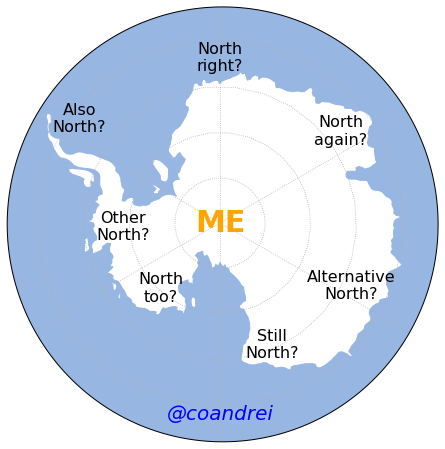

In [4]:
# polar projection
projection = ccrs.SouthPolarStereo()
subplot_kw = dict(projection=projection)

# new figure
fig, ax = plt.subplots(subplot_kw=subplot_kw, figsize=(8,8))
ax.set_extent([-180, 180, -90, -61.5], ccrs.PlateCarree())

# grid
ax.gridlines(linestyle=':')

# some features
ax.add_feature(cfeature.LAND,facecolor='white')
ax.add_feature(cfeature.OCEAN)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 360)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)


# where do I stand?
ax.text(0, -90, 'ME', 
        color='orange', 
        ha='center', va='center', 
        fontsize=30, fontweight='bold', 
        transform=ccrs.PlateCarree(),
       );
ax.text(180, -65, '@coandrei', 
        color='blue', 
        ha='center', va='center', 
        fontsize=20, fontstyle='italic', 
        transform=ccrs.PlateCarree(),
       );

# Where North?
labels = [
    (0, -70, 'North\nright?'),
    (57, -71, 'North\nagain?'),
    (120, -70, 'Alternative\nNorth?'),
    (159, -71, 'Still\nNorth?'),
    (217, -77, 'North\ntoo?'),
    (260, -77, 'Other\nNorth?'),
    (303, -68, 'Also\nNorth?'),
]
for label in labels:
    x, y, s = label
    ax.text(x, y, s, horizontalalignment='center', color='black', transform=ccrs.PlateCarree())

# save to file
ax.get_figure().set_size_inches(8,8)
ax.get_figure().savefig('me_heading_north.png', dpi=200, bbox_inches='tight')





In [5]:
# the end